In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
%matplotlib inline

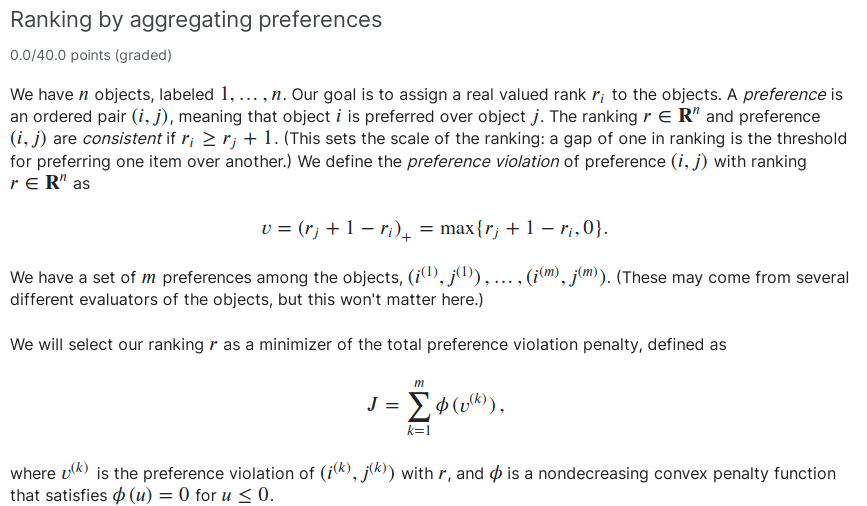

# Problem data

In [7]:
n=50
m=1000

preferences = [  
    [40,   7],
    [35,  22],
    [46,  50],
    [32,   8],
    [47,  26],
    [ 5,  26],
    [28,  10],
    [41,  30],
    [34,  21],
    [46,  33],
    [ 3,  44],
    [22,  50],
    [46,   8],
    [34,  39],
    [32,  48],
    [ 1,  39],
    [ 1,  28],
    [41,  31],
    [11,  21],
    [37,  42],
    [26,   5],
    [32,  30],
    [ 2,  27],
    [43,  46],
    [34,  47],
    [45,  44],
    [37,   9],
    [14,  23],
    [23,   2],
    [27,  31],
    [37,  33],
    [38,  31],
    [ 5,  10],
    [16,  39],
    [17,  50],
    [27,   8],
    [ 1,  49],
    [ 2,  15],
    [44,  48],
    [35,  30],
    [41,  10],
    [32,  23],
    [48,  50],
    [37,   4],
    [35,  36],
    [33,  16],
    [19,  38],
    [ 1,  38],
    [34,  47],
    [22,  25],
    [27,  49],
    [36,  19],
    [46,  30],
    [45,  22],
    [41,  24],
    [19,  21],
    [10,  48],
    [41,   9],
    [ 1,  41],
    [40,  48],
    [ 1,  48],
    [36,  31],
    [15,  21],
    [38,  10],
    [37,  49],
    [50,   8],
    [ 1,  35],
    [41,  35],
    [14,  15],
    [ 6,  33],
    [44,  26],
    [47,  49],
    [41,  31],
    [11,   2],
    [20,  47],
    [ 5,  11],
    [34,   7],
    [ 3,   4],
    [38,  46],
    [ 1,  26],
    [47,  10],
    [ 7,  26],
    [37,  34],
    [28,  46],
    [11,  16],
    [ 9,  28],
    [18,  33],
    [ 5,  12],
    [35,  49],
    [18,  25],
    [37,  21],
    [ 7,  21],
    [10,  19],
    [ 1,  32],
    [ 9,  26],
    [47,   2],
    [13,  30],
    [20,  21],
    [18,  12],
    [32,  28],
    [ 2,   5],
    [35,  21],
    [12,   7],
    [46,  48],
    [45,  31],
    [24,  36],
    [34,   3],
    [47,  21],
    [20,  18],
    [ 9,  29],
    [37,  24],
    [10,  21],
    [26,  40],
    [38,  30],
    [23,  15],
    [14,  28],
    [ 5,  42],
    [ 7,  31],
    [ 4,  36],
    [40,  24],
    [10,  31],
    [ 5,  43],
    [41,  45],
    [37,  26],
    [41,  27],
    [ 7,  33],
    [ 5,  30],
    [39,  31],
    [41,  27],
    [17,  31],
    [47,  29],
    [49,  27],
    [36,  26],
    [ 2,  42],
    [17,  26],
    [13,  49],
    [ 9,  15],
    [35,  29],
    [41,   3],
    [32,  42],
    [ 5,  27],
    [12,  11],
    [17,  34],
    [29,  39],
    [19,   8],
    [ 5,  50],
    [17,  12],
    [46,  30],
    [20,  40],
    [ 1,  17],
    [ 1,  45],
    [20,  11],
    [28,   9],
    [11,  15],
    [14,  41],
    [17,   2],
    [23,  16],
    [23,  14],
    [45,   4],
    [ 9,   8],
    [20,  38],
    [23,  11],
    [13,  28],
    [28,  39],
    [34,  14],
    [40,  11],
    [ 3,  30],
    [10,  49],
    [32,  27],
    [ 7,  26],
    [20,   4],
    [33,  10],
    [37,   9],
    [25,  49],
    [ 3,  27],
    [23,  27],
    [28,  10],
    [22,  31],
    [16,  50],
    [18,  14],
    [ 3,  30],
    [ 1,   3],
    [34,  35],
    [35,  21],
    [13,  25],
    [48,  21],
    [37,  32],
    [28,  24],
    [43,  44],
    [36,  42],
    [27,  10],
    [48,  29],
    [ 1,  10],
    [14,  26],
    [ 1,  11],
    [48,   2],
    [12,  28],
    [32,  33],
    [12,  44],
    [ 1,  33],
    [ 6,  42],
    [37,  38],
    [49,  31],
    [ 1,  24],
    [49,  29],
    [ 7,  24],
    [43,  16],
    [20,  42],
    [33,  21],
    [13,   9],
    [45,  11],
    [29,  26],
    [ 9,  40],
    [14,   8],
    [22,  15],
    [20,  22],
    [32,  48],
    [20,  45],
    [ 5,  39],
    [34,  41],
    [47,  49],
    [19,  39],
    [ 5,  29],
    [49,  44],
    [13,   2],
    [48,  34],
    [17,  38],
    [12,   4],
    [46,   2],
    [13,  24],
    [14,  24],
    [ 6,  29],
    [24,  12],
    [32,  38],
    [45,  22],
    [44,  37],
    [ 7,  16],
    [17,  44],
    [ 9,  38],
    [ 2,  30],
    [ 6,  25],
    [13,  25],
    [27,  13],
    [ 7,  50],
    [24,  13],
    [ 7,  10],
    [25,   5],
    [37,  10],
    [38,  22],
    [13,  23],
    [38,  33],
    [47,  15],
    [28,  16],
    [34,  12],
    [ 1,  40],
    [ 5,  21],
    [13,  50],
    [ 4,   5],
    [43,   4],
    [45,   1],
    [45,  32],
    [ 6,  20],
    [39,  27],
    [32,  35],
    [18,   9],
    [41,   8],
    [33,  49],
    [28,   7],
    [12,  48],
    [41,  29],
    [36,  30],
    [45,   4],
    [41,  32],
    [ 4,  48],
    [46,  33],
    [41,   8],
    [19,  16],
    [ 6,  28],
    [13,  10],
    [ 4,  40],
    [25,  16],
    [14,   8],
    [34,  42],
    [ 1,  19],
    [30,  31],
    [14,  50],
    [42,  12],
    [11,  33],
    [35,  33],
    [36,  39],
    [ 3,  21],
    [35,  50],
    [23,  26],
    [23,  44],
    [37,  32],
    [38,   2],
    [10,  21],
    [ 5,  10],
    [38,   2],
    [ 3,  50],
    [20,  31],
    [43,  20],
    [ 3,  29],
    [ 4,  27],
    [22,   8],
    [40,  29],
    [11,   8],
    [ 7,  31],
    [11,  42],
    [40,  36],
    [ 1,  15],
    [20,   7],
    [13,   2],
    [42,  36],
    [17,  49],
    [ 1,  22],
    [23,  12],
    [47,  13],
    [32,  43],
    [33,  37],
    [34,  33],
    [45,   6],
    [36,  50],
    [23,   4],
    [28,  43],
    [45,  31],
    [20,  43],
    [36,  39],
    [26,   3],
    [50,  42],
    [25,   1],
    [16,  22],
    [ 9,  16],
    [ 4,  22],
    [14,   4],
    [ 4,  29],
    [ 6,   3],
    [17,  48],
    [34,  28],
    [ 5,  45],
    [12,  16],
    [ 7,  29],
    [19,  24],
    [16,  27],
    [40,  44],
    [ 8,  50],
    [18,  32],
    [18,  20],
    [46,  22],
    [ 9,  47],
    [44,  27],
    [32,  13],
    [17,  19],
    [ 3,  19],
    [12,  28],
    [13,  28],
    [43,  44],
    [41,  10],
    [12,  24],
    [38,   7],
    [13,  41],
    [ 9,  26],
    [ 7,  29],
    [33,  32],
    [ 3,  33],
    [37,  12],
    [ 8,  28],
    [ 3,   7],
    [ 4,  48],
    [43,  26],
    [43,  35],
    [31,   5],
    [41,  33],
    [40,  11],
    [ 9,  12],
    [45,  23],
    [13,  29],
    [10,  39],
    [32,  24],
    [20,   6],
    [39,  24],
    [11,  21],
    [30,  31],
    [ 2,  26],
    [28,  16],
    [41,   9],
    [21,  45],
    [17,  37],
    [ 7,  30],
    [46,  25],
    [25,   1],
    [18,  37],
    [ 6,   2],
    [47,   8],
    [19,  16],
    [ 9,   2],
    [49,  39],
    [ 2,  47],
    [13,  19],
    [34,  23],
    [45,  25],
    [ 1,  28],
    [49,  33],
    [16,  29],
    [17,  23],
    [48,  29],
    [37,  50],
    [37,  29],
    [26,  49],
    [14,   8],
    [35,  36],
    [46,  31],
    [38,  15],
    [47,  46],
    [32,   4],
    [30,  50],
    [34,  15],
    [33,  14],
    [22,  15],
    [37,  45],
    [40,  21],
    [47,  38],
    [32,  48],
    [45,  14],
    [38,   8],
    [23,   3],
    [40,  22],
    [14,  44],
    [37,  47],
    [ 5,  44],
    [22,  42],
    [38,  20],
    [22,  39],
    [14,  19],
    [ 9,  16],
    [ 5,  33],
    [ 3,  37],
    [35,  39],
    [13,  25],
    [12,  41],
    [34,   3],
    [20,  14],
    [33,  49],
    [23,  19],
    [ 1,  39],
    [33,  25],
    [ 9,  23],
    [ 1,  50],
    [ 7,  31],
    [ 1,  12],
    [40,  15],
    [37,  19],
    [10,  24],
    [14,  16],
    [11,   8],
    [14,   4],
    [43,  36],
    [34,  44],
    [ 3,   7],
    [33,   8],
    [46,  40],
    [16,  27],
    [28,   2],
    [17,  31],
    [48,  15],
    [ 1,   2],
    [29,  39],
    [26,   7],
    [ 3,  27],
    [36,  21],
    [12,  35],
    [13,  10],
    [45,  36],
    [32,  31],
    [13,  31],
    [20,   7],
    [34,  47],
    [39,  49],
    [50,  39],
    [ 2,  25],
    [ 5,  22],
    [32,  16],
    [10,  19],
    [34,  49],
    [19,  49],
    [47,  19],
    [37,  29],
    [20,  15],
    [35,  31],
    [45,  49],
    [40,  29],
    [46,  16],
    [ 5,  29],
    [49,  25],
    [46,  50],
    [ 6,  24],
    [ 6,  35],
    [26,  30],
    [34,  13],
    [12,  39],
    [18,  24],
    [ 1,  32],
    [ 1,  36],
    [28,  35],
    [47,  44],
    [45,   8],
    [43,  35],
    [18,  35],
    [13,  35],
    [19,  15],
    [14,  27],
    [21,   5],
    [20,   4],
    [33,  26],
    [34,  42],
    [38,  46],
    [44,  15],
    [ 1,  41],
    [18,  11],
    [12,   7],
    [40,  10],
    [17,  13],
    [14,  33],
    [19,  16],
    [48,  42],
    [ 5,  12],
    [17,  11],
    [ 4,  25],
    [22,  24],
    [ 9,  27],
    [13,  15],
    [40,  50],
    [28,  49],
    [ 4,  17],
    [ 9,  29],
    [45,  21],
    [40,   2],
    [26,  39],
    [40,   2],
    [37,  49],
    [ 2,  12],
    [ 4,  27],
    [22,   8],
    [45,  50],
    [33,  19],
    [46,  15],
    [ 3,  30],
    [44,  15],
    [37,  36],
    [23,  32],
    [ 5,  40],
    [23,  15],
    [20,  28],
    [36,   8],
    [41,  44],
    [48,  24],
    [20,  41],
    [45,  35],
    [45,  47],
    [49,  12],
    [32,  39],
    [10,  21],
    [ 1,  41],
    [ 6,  47],
    [ 9,  50],
    [18,  12],
    [23,  46],
    [18,  49],
    [ 6,  16],
    [40,  50],
    [23,  16],
    [ 6,  16],
    [19,  48],
    [46,  19],
    [42,   8],
    [13,  27],
    [44,  31],
    [13,  12],
    [40,  48],
    [ 1,  13],
    [ 6,  42],
    [20,  32],
    [40,  22],
    [17,   4],
    [28,  50],
    [26,  42],
    [16,  39],
    [37,  39],
    [25,  36],
    [44,  24],
    [17,  49],
    [ 1,  44],
    [46,  43],
    [41,  18],
    [21,  13],
    [ 4,  24],
    [ 3,  24],
    [40,  16],
    [ 3,  15],
    [33,  42],
    [43,  19],
    [43,  42],
    [19,   2],
    [49,  42],
    [40,  11],
    [11,   3],
    [37,  40],
    [45,  18],
    [ 1,  36],
    [19,   2],
    [12,  48],
    [50,  39],
    [37,  48],
    [10,  21],
    [29,  26],
    [47,  38],
    [41,  16],
    [45,  42],
    [23,  29],
    [40,  16],
    [45,  50],
    [44,  15],
    [16,   7],
    [ 7,  21],
    [ 5,  39],
    [14,  10],
    [36,  39],
    [17,  40],
    [19,  27],
    [20,  25],
    [ 5,  48],
    [43,  40],
    [17,   5],
    [35,  26],
    [16,  42],
    [17,   9],
    [33,  39],
    [ 1,  46],
    [16,  27],
    [36,  17],
    [18,  16],
    [ 5,  23],
    [36,  49],
    [ 6,   7],
    [45,  48],
    [48,  18],
    [23,  26],
    [14,  25],
    [42,  23],
    [44,  42],
    [37,  41],
    [37,  24],
    [25,  24],
    [11,   3],
    [43,  50],
    [19,  30],
    [12,   8],
    [44,  31],
    [27,  15],
    [33,  15],
    [ 3,  21],
    [32,  44],
    [ 1,  25],
    [34,  10],
    [ 3,   2],
    [47,  44],
    [37,  44],
    [18,  42],
    [16,  50],
    [13,  36],
    [20,   8],
    [44,  48],
    [19,   2],
    [37,  41],
    [18,   8],
    [28,  44],
    [13,  32],
    [35,  25],
    [ 6,  32],
    [11,  49],
    [ 9,  39],
    [ 9,  33],
    [22,  49],
    [36,  11],
    [26,  25],
    [18,  31],
    [47,  42],
    [ 5,  45],
    [ 9,  47],
    [48,  50],
    [34,  48],
    [20,  19],
    [35,  26],
    [ 1,  42],
    [ 5,  42],
    [ 1,  35],
    [45,  36],
    [42,  48],
    [35,  19],
    [25,  43],
    [ 5,  40],
    [18,  21],
    [25,   1],
    [41,  21],
    [28,  48],
    [37,  43],
    [ 9,  32],
    [45,  21],
    [48,   2],
    [25,  21],
    [ 1,  49],
    [19,  26],
    [ 7,  27],
    [27,   3],
    [ 1,  32],
    [10,  15],
    [ 7,  43],
    [21,  42],
    [ 7,  30],
    [ 5,  49],
    [ 6,  10],
    [49,  30],
    [17,  45],
    [18,  37],
    [41,  42],
    [19,  49],
    [11,  10],
    [16,  21],
    [34,   4],
    [49,  42],
    [11,  29],
    [30,  23],
    [ 9,  14],
    [17,  35],
    [19,  31],
    [16,  22],
    [38,  21],
    [17,  33],
    [46,  33],
    [17,   4],
    [30,  24],
    [ 3,  23],
    [12,  11],
    [13,  20],
    [35,  33],
    [34,  50],
    [32,   8],
    [12,  50],
    [10,  31],
    [35,  30],
    [37,  30],
    [20,  26],
    [11,  24],
    [14,  10],
    [ 7,  17],
    [49,  31],
    [ 1,  21],
    [12,  19],
    [19,  29],
    [23,  36],
    [15,  26],
    [10,  31],
    [21,  38],
    [12,   7],
    [35,  21],
    [ 3,  48],
    [ 3,  30],
    [12,  38],
    [ 2,  39],
    [17,  22],
    [37,  33],
    [ 7,  36],
    [21,  34],
    [17,  24],
    [48,  25],
    [20,  50],
    [35,  42],
    [43,  15],
    [ 3,  22],
    [ 5,  42],
    [18,  46],
    [16,  40],
    [13,  20],
    [22,  24],
    [33,  29],
    [ 5,  26],
    [34,  36],
    [35,  29],
    [ 1,  10],
    [23,  11],
    [32,  42],
    [ 1,   8],
    [22,  31],
    [12,  33],
    [16,  41],
    [19,  31],
    [28,  16],
    [14,  30],
    [ 1,  24],
    [11,  48],
    [20,  31],
    [50,  15],
    [15,   8],
    [18,  11],
    [12,  15],
    [13,  33],
    [43,  30],
    [32,  36],
    [ 5,  41],
    [20,  24],
    [ 4,  49],
    [28,  50],
    [43,  36],
    [37,   6],
    [17,  41],
    [37,  39],
    [13,   7],
    [35,  21],
    [34,  11],
    [23,   4],
    [ 2,   9],
    [41,  23],
    [48,  25],
    [36,  24],
    [47,  46],
    [44,  25],
    [49,  32],
    [ 9,  23],
    [ 3,  31],
    [29,  27],
    [33,  48],
    [32,   1],
    [39,  27],
    [39,  50],
    [ 7,  15],
    [ 7,  49],
    [35,  21],
    [21,  42],
    [ 5,  41],
    [10,  22],
    [ 5,   3],
    [32,  43],
    [41,  30],
    [45,  34],
    [16,  44],
    [ 9,  42],
    [ 7,  25],
    [34,  23],
    [ 9,   3],
    [18,  10],
    [37,  45],
    [44,  30],
    [33,  34],
    [34,  29],
    [34,   5],
    [ 4,  29],
    [46,  15],
    [41,   8],
    [11,   3],
    [34,  36],
    [47,  48],
    [34,  26],
    [23,  21],
    [ 7,  31],
    [ 1,  27],
    [28,  29],
    [37,  19],
    [ 6,  35],
    [39,  34],
    [47,  25],
    [17,  29],
    [19,  22],
    [48,  22],
    [46,  24],
    [19,  25],
    [ 7,  36],
    [19,  31],
    [34,  32],
    [17,  47],
    [20,  32],
    [10,  22],
    [47,  19],
    [ 3,  35],
    [39,  22],
    [49,  41],
    [ 1,  32],
    [14,  44],
    [ 1,  42],
    [41,  44],
    [14,  40],
    [ 9,  15],
    [ 6,  11],
    [41,  42],
    [42,  34],
    [ 9,  44],
    [12,  19],
    [ 6,  42],
    [43,  24],
    [32,  21],
    [16,  39],
    [23,  29],
    [23,  16],
    [ 9,  25],
    [46,  27],
    [18,  20],
    [18,  17],
    [40,  46],
    [14,  24],
    [ 1,   9],
    [ 1,  25],
    [49,  15],
    [48,  21],
    [28,  38],
    [35,  39],
    [32,  33],
    [ 9,  10],
    [ 3,  35],
    [16,  50],
    [ 4,  24],
    [44,  17],
    [15,  31],
    [34,  21],
    [33,  27],
    [48,  32],
    [47,  50],
    [23,  15],
    [47,  26],
    [37,  39],
    [ 9,  19],
    [ 5,  25],
    [13,  25],
    [32,  22],
    [ 4,  10],
    [ 3,  44],
    [31,  18],
    [28,  19],
    [11,  28],
    [19,  25],
    [35,  30],
    [23,  48],
    [ 9,  16],
    [25,   8],
    [14,  22],
    [ 1,  41],
    [34,   3],
    [44,  30],
    [23,   9],
    [32,   2],
    [ 1,  11],
    [28,  37],
    [14,  38],
    [38,  42],
    [32,  42],
    [33,  25],
    [ 8,  24],
    [ 3,   4],
    [ 4,  39],
    [29,  25],
    [18,  20],
    [41,  47],
    [34,  15],
    [ 9,   4],
    [ 6,  22],
    [23,  48],
    [14,  48],
    [41,  49],
    [ 6,  32],
    [30,  50],
    [16,  45],
    [12,  36],
    [44,  50],
    [12,  16],
    [ 7,  48],
    [42,   8],
    [30,  42],
    [47,  43],
    [19,  30],
    [ 6,  26],
    [15,  24],
    [30,  15],
    [37,   4],
    [ 3,  38],
    [14,  26],
    [41,  11],
    [ 4,  42],
    [12,  32],
    [44,  20],
    [ 8,  24],
    [45,  29],
    [46,  25],
    [13,  50],
    [ 7,  19],
    [49,  30],
    [47,   4],
    [45,  19],
    [10,  48],
    [ 7,  48],
    [16,  27],
    [40,  21],
    [14,  47],
]
assert m == len(preferences)

# Solving

In [8]:
def solve(pen_func):
    r = cp.Variable(n)
    fo = 0
    for (u,v) in preferences:
        u -= 1
        v -= 1
        # u > v => expected r(u) >= r(v) + 1
        erro = cp.pos(r[v] - r[u] + 1) # \in R
        fo += pen_func(erro)
    
    prob = cp.Problem(cp.Minimize(fo))
    prob.solve()
    assert prob.status == cp.OPTIMAL
    return r.value

In [20]:
def violations(r):
    erro = []
    for u,v in preferences:
        u -= 1; v -= 1
        erro.append(max(r[v]-r[u]+1, 0))
    return np.array(erro)

In [21]:
r_ls = solve(cp.square)
r_lasso = solve(lambda x : x)
erro_ls = violations(r_ls)
erro_lasso = violations(r_lasso)

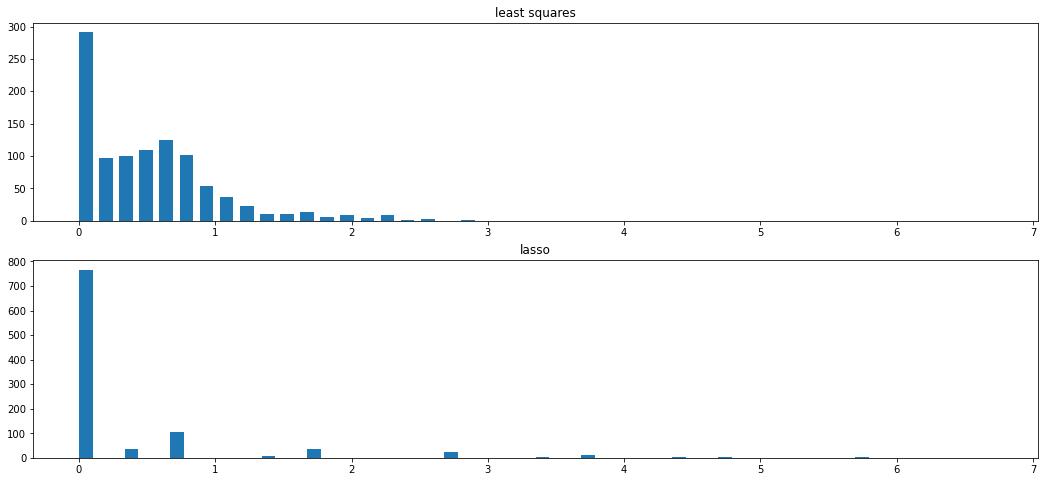

In [22]:
fig, ax = plt.subplots(2,1, figsize =(18,8), sharex = True)
ax[0].hist(erro_ls, bins = 20, width = 1/10)
ax[0].set_title('least squares')
ax[1].hist(erro_lasso, bins = 20, width = 1/10)
ax[1].set_title('lasso')

ax[0].xaxis.set_tick_params(which='both', labelbottom=True)
plt.show()

In [24]:
tol = 0.001
(erro_ls > tol).sum() - (erro_lasso > tol).sum()

546